In [272]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [207]:
def getDummy(df):
    df_dummy = pd.get_dummies(df,drop_first=True)
    
    return df_dummy

def dropYZ(df):
    df_drop = df.drop(columns=["y","z"],axis=1)
    return df_drop
    
def dropXYZ(df):
    df_drop = df.drop(columns=["x","y","z"],axis=1)
    return df_drop

def standarize(df):
    df_standar = df.set_index("id")
    

def dropPrice(df):
    df_drop = df.drop(columns=["price"],axis=1)
    return df_drop

def toCSV(df,name):
    df.to_csv(f"../outputs/{name}.csv")

In [282]:
# TRAINING dataset
dftr = pd.read_csv("../inputs/diamonds_train.csv")
dftr.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [283]:
dftr.shape

(40345, 11)

In [327]:
# TEST dataset
dftt = pd.read_csv("../inputs/diamonds_test.csv")
dftt.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [285]:
dftt.shape

(13449, 10)

### OPCIONES



In [380]:
dftt.cut.value_counts()

Ideal        5347
Premium      3445
Very Good    3001
Good         1260
Fair          396
Name: cut, dtype: int64

In [381]:
dftt.color.value_counts()

G    2800
E    2484
F    2387
H    2072
D    1661
I    1313
J     732
Name: color, dtype: int64

In [385]:
dftt.clarity.value_counts()

SI1     3322
VS2     3065
SI2     2266
VS1     2064
VVS2    1217
VVS1     909
IF       427
I1       179
Name: clarity, dtype: int64

In [386]:
dftt.describe()

,id,carat,depth,table,x,y,z
count,13449.00000,13449.000000,13449.000000,13449.000000,13449.000000,13449.000000,13449.000000
mean,6724.00000,0.798023,61.743156,57.484170,5.732387,5.734190,3.540980
std,3882.53622,0.470641,1.436475,2.232334,1.117514,1.109695,0.734237
min,0.00000,0.200000,43.000000,50.100000,0.000000,0.000000,0.000000
25%,3362.00000,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,6724.00000,0.700000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,10086.00000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,13448.00000,4.500000,73.600000,73.000000,10.230000,10.160000,31.800000


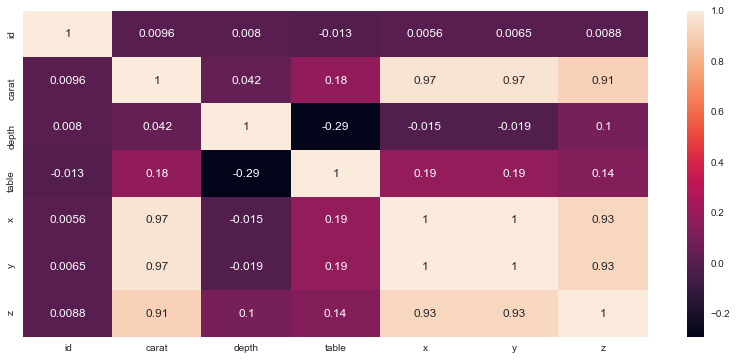

In [388]:
mc = dftt.corr()
plt.figure(figsize=(14,6))
sn.heatmap(mc,annot=True)

## FIRST TEST

In [62]:
from sklearn.linear_model import LinearRegression

In [390]:
dftr_first = getDummy(dftr)
X=dftr_first.drop('price',axis=1)
y=dftr_first['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

print(X_test,y_test)

          id  carat  depth  table     x     y     z  cut_Good  cut_Ideal  \
15243  15243   0.61   59.7   57.0  5.57  5.52  3.31         0          1   
21955  21955   0.70   60.9   56.0  5.73  5.79  3.51         0          1   
24615  24615   1.73   58.0   62.0  7.95  7.91  4.60         0          0   
27871  27871   1.30   62.3   54.0  6.97  7.03  4.36         0          1   
9375    9375   1.61   62.4   55.0  7.49  7.52  4.68         0          1   
...      ...    ...    ...    ...   ...   ...   ...       ...        ...   
18448  18448   1.31   62.1   58.0  6.98  6.97  4.33         0          0   
9700    9700   0.71   62.9   56.0  5.73  5.68  3.59         0          1   
25118  25118   0.51   60.7   56.0  5.18  5.23  3.16         0          1   
30800  30800   0.30   60.9   58.0  4.29  4.32  2.62         0          1   
18296  18296   0.97   60.4   61.0  6.40  6.37  3.86         0          0   

       cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
15243   

In [391]:
y_pred = model.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
r2

0.920771854297674

In [392]:
y_test_pred = model.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
r2_test

0.9185672689409249

In [393]:
msre = mean_squared_error(y_test, y_test_pred)
msre

1314494.500674493

In [396]:
dftt_first = getDummy(dftt)

In [397]:
y_first = model.predict(dftt_first)

In [398]:
dftt_first['price'] = y_first

In [399]:
dftt_first

,id,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0,1.10,62.2,58.0,6.69,6.60,4.13,0,0,1,...,0,0,0,0,1,0,0,0,0,4642.161044
1,1,0.51,62.5,57.0,5.07,5.10,3.18,0,1,0,...,1,0,0,1,0,0,0,0,0,178.044571
2,2,2.03,61.9,59.0,8.14,8.09,5.02,0,0,1,...,0,0,0,1,0,0,0,0,0,15167.173035
3,3,1.21,60.0,60.0,6.96,6.91,4.16,0,0,1,...,0,0,0,1,0,0,0,0,0,7382.065634
4,4,0.55,61.8,55.0,5.27,5.22,3.24,0,1,0,...,0,0,0,1,0,0,0,0,0,1766.689378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,60.0,58.0,4.37,4.40,2.63,0,0,1,...,0,0,0,0,0,0,1,0,0,539.338469
13445,13445,0.55,60.8,56.0,5.31,5.34,3.24,0,1,0,...,0,0,0,0,0,0,0,0,1,3324.305433
13446,13446,0.23,61.3,58.0,3.94,3.96,2.42,0,0,0,...,0,0,0,0,0,0,0,1,0,826.452910
13447,13447,0.30,61.4,58.0,4.29,4.31,2.64,0,1,0,...,0,0,0,0,0,0,1,0,0,786.393324


In [430]:
dftt_1sub = dftt_first[['id','price']]
dftt_1sub = dftt_1sub.set_index('id')

In [431]:
dftt_1sub

,price
id,
0,4642.161044
1,178.044571
2,15167.173035
3,7382.065634
4,1766.689378
...,...
13444,539.338469
13445,3324.305433
13446,826.452910


In [432]:
dftt_1sub.to_csv("../outputs/d1_s1.csv")

In [406]:
df_res1 = pd.DataFrame()
df_res1["predicc"]=y_test_pred.round(2)
df_res1["test"]=y_test.reset_index(drop=True)
df_res1["diff"]=abs(y_test_pred - y_test.reset_index(drop=True))

In [407]:
df_res1

,predicc,test,diff
0,2869.45,2115,754.452860
1,2805.83,2965,159.174559
2,12371.67,13365,993.330586
3,10167.27,15874,5706.733392
4,10190.00,10236,46.000751
...,...,...,...
8064,8607.15,5722,2885.145733
8065,3349.34,2443,906.340717
8066,1844.02,1557,287.015099
8067,-125.41,491,616.406548


In [376]:
dftt_1sub.describe()

,price
count,13449.000000
mean,3911.533693
std,3798.014264
min,-3781.859584
25%,1051.446957
50%,2847.642379
75%,5890.308815
max,33964.907759


,index,price
0,10483,-3623.313328
1,7734,-3560.161154
2,6706,-3379.596488
3,113,-3334.771337
4,1487,-3225.326359


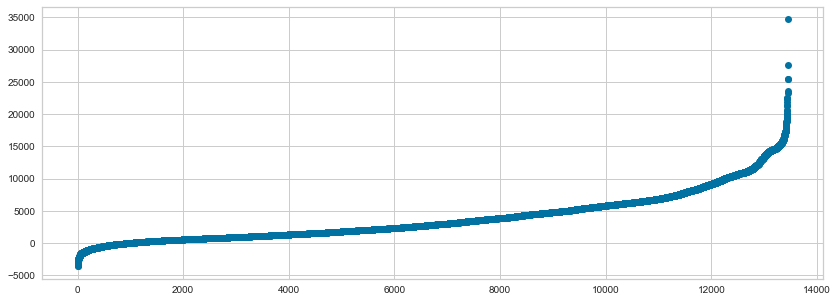

In [433]:
dftt_1sub = dftt_first[['price']].sort_values(by=["price"],ascending=True).reset_index()
display(dftt_1sub.head())
plt.figure(figsize=(14,5))
plt.plot(dftt_1sub["price"],"o")

In [434]:
dftt_1sub[dftt_1sub["price"]<0]

,index,price
0,10483,-3623.313328
1,7734,-3560.161154
2,6706,-3379.596488
3,113,-3334.771337
4,1487,-3225.326359
...,...,...
965,9498,-2.644163
966,2535,-2.261746
967,11625,-2.096155
968,152,-1.986014


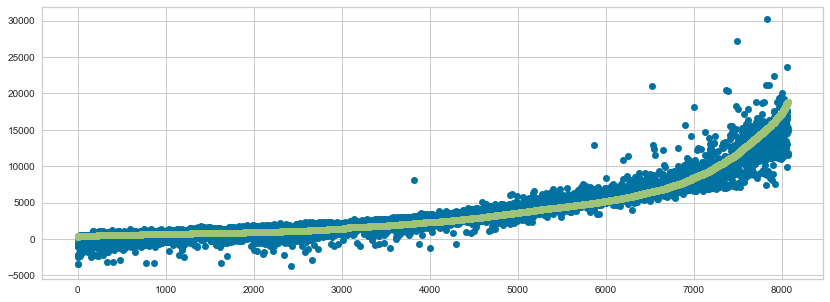

In [435]:
plt.figure(figsize=(14,5))
plt.plot(df_res1[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True),"o");

## SECOND TEST

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [436]:
df_drop = getDummy(dftr)
df_drop = dropXYZ(df_drop)

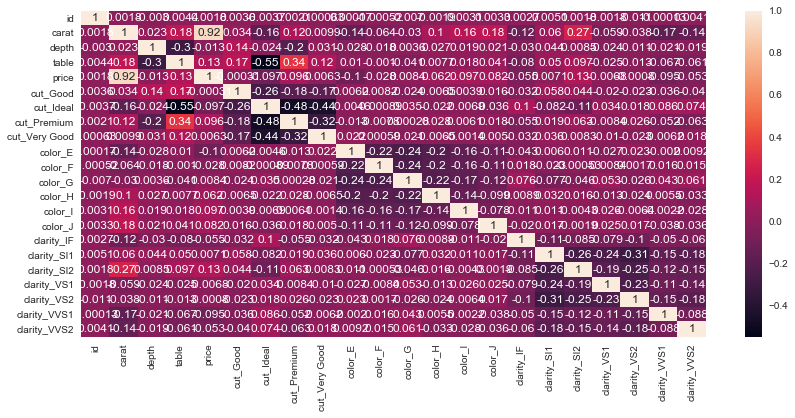

In [437]:
mc = df_drop.corr()
plt.figure(figsize=(14,6))
sn.heatmap(mc,annot=True)

In [256]:
model_rf = RandomForestRegressor(n_estimators=100) 

In [257]:
X=df_drop.drop('price',axis=1)
y=df_drop['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_rf.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

(32276, 21) (32276,)


In [258]:
y_pred = model_rf.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
r2

0.9965740419860765

In [259]:
y_test_pred = model_rf.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
r2_test

0.9737104664587424

In [260]:
dftt_drop = dropXYZ(dftt_dummy)

print(dftt_drop.shape)
dftt_drop.columns

(13449, 21)


Index(['id', 'carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [261]:
dftt_drop.head()

,id,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.10,62.2,58.0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0.51,62.5,57.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.03,61.9,59.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.21,60.0,60.0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4,0.55,61.8,55.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [262]:
y_second = model_rf.predict(dftt_drop)

print(y_second.shape)

(13449,)


In [428]:
res2 = pd.Series(y_second).sort_values().reset_index(drop=True)

print(res2)

0          365.37
1          368.72
2          369.37
3          374.26
4          375.26
           ...   
13444    17694.93
13445    17715.58
13446    17879.11
13447    17925.11
13448    18078.81
Length: 13449, dtype: float64


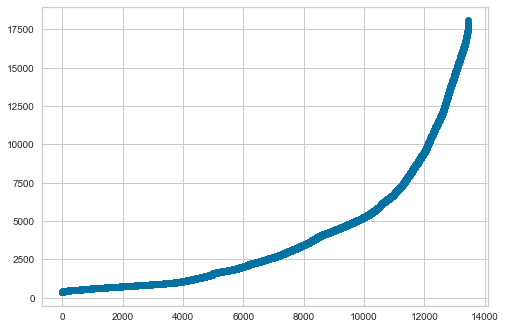

In [429]:
plt.plot(res2,"o")

In [265]:
dftt_drop["price"] = y_second

In [266]:
dftt_2sub = dftt_drop[["id","price"]]
dftt_2sub = dftt_2sub.set_index('id')
dftt_2sub

,price
id,
0,4513.43
1,1057.76
2,16993.26
3,6342.08
4,1589.46
...,...
13444,728.63
13445,2503.36
13446,513.88


In [224]:
dftt_2sub.describe()

,price
count,13449.000000
mean,3945.796154
std,3922.790762
min,363.230000
25%,920.710000
50%,2484.950000
75%,5348.440000
max,18232.670000


In [271]:
toCSV(dftt_2sub,"d3_s1")

In [486]:
df_res2 = pd.DataFrame()
df_res2["predicc"]=y_test_pred.round(2)
df_res2["test"]=y_test.reset_index(drop=True)
df_res2["diff"]=abs(y_test_pred - y_test.reset_index(drop=True))

In [487]:
df_res2

,predicc,test,diff
0,4258.06,4501,242.944548
1,980.36,939,41.363500
2,4317.24,3984,333.238667
3,12529.12,12320,209.124467
4,3246.10,2911,335.104000
...,...,...,...
8064,4395.59,4413,17.411000
8065,3480.41,3615,134.590000
8066,2967.29,3277,309.708000
8067,14494.10,12458,2036.103667


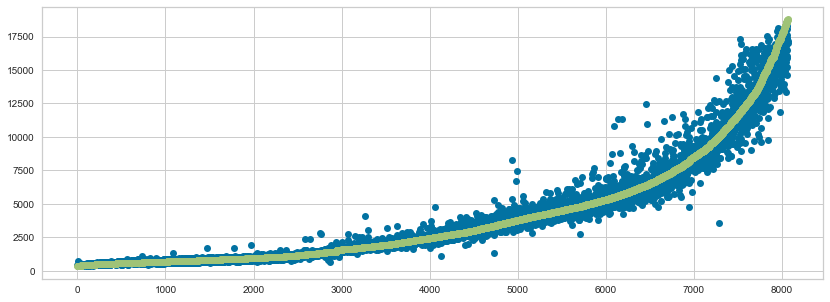

In [488]:
plt.figure(figsize=(14,5))
plt.plot(df_res2[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True),"o");

In [489]:
## mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

msre = mean_squared_error(y_test, y_test_pred)

In [490]:
msre

387491.53875149676

In [492]:
test2_df = df_res2[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True)

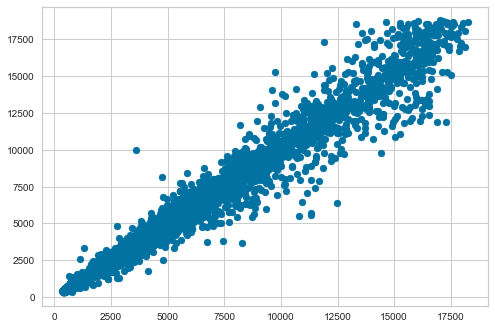

In [493]:
plt.scatter(test2_df["predicc"], test2_df["test"])

## THIRD TEST

In [451]:
dftr_standar = dftr.set_index("id")

In [452]:
dftr_standar = getDummy(dftr_standar)
dftr_standar = dropXYZ(dftr_standar)


X = dropPrice(dftr_standar)
y = dftr_standar["price"]

In [453]:
scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)

X_stand = pd.DataFrame(X_stand)

In [454]:
X_stand

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.037316,-0.174910,0.246448,-0.314483,-0.816623,1.707586,-0.538447,-0.469697,2.157801,-0.515178,-0.426120,-0.336058,-0.232556,-0.186563,-0.562990,-0.453577,2.371206,-0.542123,-0.269825,-0.324285
1,-1.028243,-0.665206,-0.648784,-0.314483,1.224555,-0.585622,-0.538447,-0.469697,-0.463435,-0.515178,-0.426120,-0.336058,-0.232556,-0.186563,1.776231,-0.453577,-0.421726,-0.542123,-0.269825,-0.324285
2,-1.049327,0.385428,-1.544015,-0.314483,1.224555,-0.585622,-0.538447,-0.469697,2.157801,-0.515178,-0.426120,-0.336058,-0.232556,-0.186563,1.776231,-0.453577,-0.421726,-0.542123,-0.269825,-0.324285
3,0.510857,0.175301,0.246448,-0.314483,1.224555,-0.585622,-0.538447,2.129032,-0.463435,-0.515178,-0.426120,-0.336058,-0.232556,-0.186563,-0.562990,-0.453577,-0.421726,-0.542123,-0.269825,3.083707
4,-0.311402,-0.244952,-1.096399,-0.314483,1.224555,-0.585622,-0.538447,-0.469697,-0.463435,-0.515178,-0.426120,-0.336058,4.300039,-0.186563,1.776231,-0.453577,-0.421726,-0.542123,-0.269825,-0.324285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,-0.627656,0.105259,-0.648784,-0.314483,1.224555,-0.585622,-0.538447,2.129032,-0.463435,-0.515178,-0.426120,-0.336058,-0.232556,-0.186563,-0.562990,-0.453577,2.371206,-0.542123,-0.269825,-0.324285
40341,-0.986076,0.035216,-0.648784,-0.314483,1.224555,-0.585622,-0.538447,-0.469697,-0.463435,-0.515178,-0.426120,-0.336058,-0.232556,-0.186563,-0.562990,-0.453577,-0.421726,1.844601,-0.269825,-0.324285
40342,-0.838491,-0.174910,0.246448,-0.314483,-0.816623,1.707586,-0.538447,-0.469697,-0.463435,1.941078,-0.426120,-0.336058,-0.232556,-0.186563,-0.562990,-0.453577,-0.421726,-0.542123,3.706104,-0.324285
40343,0.553024,-0.385037,-0.201168,-0.314483,1.224555,-0.585622,-0.538447,-0.469697,-0.463435,-0.515178,-0.426120,2.975679,-0.232556,-0.186563,-0.562990,-0.453577,2.371206,-0.542123,-0.269825,-0.324285


In [455]:
model_st = RandomForestRegressor(n_estimators=500) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_st.fit(X_train, y_train)

print(X_train.shape,y_train.shape)

(32276, 20) (32276,)


In [456]:
y_pred = model_st.predict(X_train)

##sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
r2 = metrics.r2_score(y_train,y_pred)
r2

0.9965938470940253

In [457]:
y_test_pred = model_st.predict(X_test)

r2_test = metrics.r2_score(y_test,y_test_pred)
r2_test

0.9756020397364031

In [458]:
dftt_standar = dftt.set_index("id")
dftt_standar = getDummy(dftt_standar)
dftt_standar = dropXYZ(dftt_standar)

scaler.fit(dftt_standar)
Xtt_scaler = scaler.transform(dftt_standar)

Xtt_scaler = pd.DataFrame(Xtt_scaler)

In [459]:
Xtt_scaler

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.641654,0.318043,0.231081,-0.321515,-0.812380,1.704089,-0.535940,-0.475961,-0.464525,-0.512772,2.343252,-0.328923,-0.239918,-0.181082,-0.572742,2.221515,-0.425783,-0.543291,-0.269236,-0.315425
1,-0.612003,0.526896,-0.216898,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,-0.464525,-0.512772,-0.426757,3.040223,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425
2,2.617757,0.109191,0.679059,-0.321515,-0.812380,1.704089,-0.535940,-0.475961,-0.464525,1.950183,-0.426757,-0.328923,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425
3,0.875386,-1.213540,1.127037,-0.321515,-0.812380,1.704089,-0.535940,-0.475961,2.152735,-0.512772,-0.426757,-0.328923,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425
4,-0.527010,0.039574,-1.112854,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,2.152735,-0.512772,-0.426757,-0.328923,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,-1.058220,-1.213540,0.231081,-0.321515,-0.812380,1.704089,-0.535940,2.101012,-0.464525,-0.512772,-0.426757,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,1.840633,-0.269236,-0.315425
13445,-0.527010,-0.656601,-0.664876,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,-0.464525,-0.512772,-0.426757,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,-0.543291,-0.269236,3.170323
13446,-1.206959,-0.308514,0.231081,-0.321515,-0.812380,-0.586824,1.865879,2.101012,-0.464525,-0.512772,-0.426757,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,-0.543291,3.714213,-0.315425
13447,-1.058220,-0.238896,0.231081,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,-0.464525,-0.512772,-0.426757,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,1.840633,-0.269236,-0.315425


In [460]:
y_third = model_st.predict(Xtt_scaler)

In [461]:
Xtt_scaler["price"]=y_third

In [462]:
Xtt_scaler

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,price
0,0.641654,0.318043,0.231081,-0.321515,-0.812380,1.704089,-0.535940,-0.475961,-0.464525,-0.512772,...,-0.328923,-0.239918,-0.181082,-0.572742,2.221515,-0.425783,-0.543291,-0.269236,-0.315425,1441.708
1,-0.612003,0.526896,-0.216898,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,-0.464525,-0.512772,...,3.040223,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425,656.132
2,2.617757,0.109191,0.679059,-0.321515,-0.812380,1.704089,-0.535940,-0.475961,-0.464525,1.950183,...,-0.328923,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425,14175.430
3,0.875386,-1.213540,1.127037,-0.321515,-0.812380,1.704089,-0.535940,-0.475961,2.152735,-0.512772,...,-0.328923,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425,3988.944
4,-0.527010,0.039574,-1.112854,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,2.152735,-0.512772,...,-0.328923,-0.239918,-0.181082,1.745985,-0.450143,-0.425783,-0.543291,-0.269236,-0.315425,704.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,-1.058220,-1.213540,0.231081,-0.321515,-0.812380,1.704089,-0.535940,2.101012,-0.464525,-0.512772,...,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,1.840633,-0.269236,-0.315425,637.126
13445,-0.527010,-0.656601,-0.664876,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,-0.464525,-0.512772,...,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,-0.543291,-0.269236,3.170323,708.796
13446,-1.206959,-0.308514,0.231081,-0.321515,-0.812380,-0.586824,1.865879,2.101012,-0.464525,-0.512772,...,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,-0.543291,3.714213,-0.315425,686.210
13447,-1.058220,-0.238896,0.231081,-0.321515,1.230952,-0.586824,-0.535940,-0.475961,-0.464525,-0.512772,...,-0.328923,-0.239918,-0.181082,-0.572742,-0.450143,-0.425783,1.840633,-0.269236,-0.315425,641.938


In [478]:
df_res3 = pd.DataFrame()
df_res3["predicc"]=y_test_pred.round(2)
df_res3["test"]=y_test.reset_index(drop=True)
df_res3["diff"]=(y_test_pred - y_test.reset_index(drop=True))

df_res3.sort_values("diff",ascending=False).head(50)

,predicc,test,diff
3703,12495.99,6397,6098.990867
2690,11345.32,5593,5752.324733
4569,11345.32,5695,5650.324733
4334,17282.83,11867,5415.829467
6425,10809.98,5510,5299.982567
5903,16910.29,11903,5007.287000
6622,14428.76,9794,4634.760667
6471,8272.96,3696,4576.964262
7928,10942.68,6436,4506.683500
3768,16148.54,11946,4202.541433


In [464]:
msre3 = mean_squared_error(y_test, y_test_pred)

In [465]:
msre3

387491.53875149676

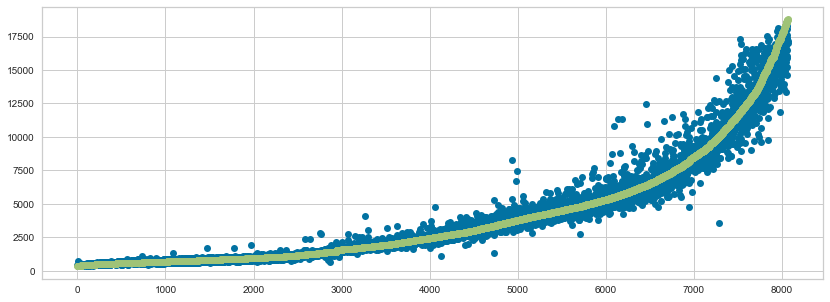

In [466]:
plt.figure(figsize=(14,5))
plt.plot(df_res3[["predicc","test"]].sort_values("test",ascending=True).reset_index(drop=True),"o");

In [467]:
Xtt_scaler = Xtt_scaler[['price']]
Xtt_scaler.index.names = ['id']

In [468]:
Xtt_scaler

,price
id,
0,1441.708
1,656.132
2,14175.430
3,3988.944
4,704.880
...,...
13444,637.126
13445,708.796
13446,686.210


In [469]:
toCSV(Xtt_scaler,"d3_s2")

In [482]:
test3_df = df_res3[["predicc","test"]].sort_values("test",ascending=True).reset_index()

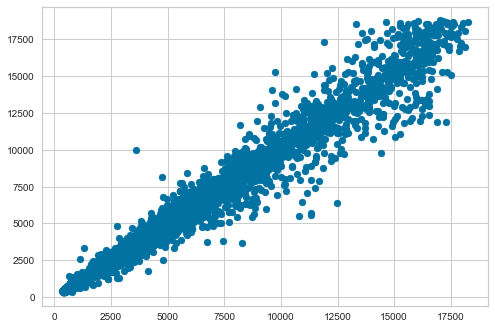

In [483]:
plt.scatter(test3_df["predicc"], test3_df["test"])